In [74]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.svm import SVC
from tensorflow import keras
import tensorflow as tf

In [63]:
def sig(x):
  return 1/(1+np.exp(-x))

In [5]:
path = os.listdir('/content/drive/MyDrive/data/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/data/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [8]:
X = np.array(X)
Y = np.array(Y)


In [9]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [10]:
X.shape

(1222, 200, 200)

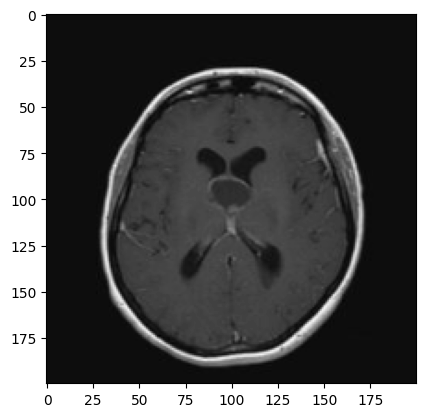

In [11]:
plt.imshow(X[0], cmap='gray')

In [16]:
X_updated = X.reshape((1222,200*200))
X_updated.shape

(1222, 40000)

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [37]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((977, 40000), (245, 40000), (977,), (245,))

In [20]:
xtrain = xtrain/255
xtest = xtest/255
xtrain

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.53787005e-05, 1.53787005e-05, 1.53787005e-05],
       [2.92195309e-04, 2.92195309e-04, 2.92195309e-04, ...,
        2.92195309e-04, 2.92195309e-04, 2.92195309e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.53787005e-05, 1.53787005e-05, 1.53787005e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.53787005e-05, 1.53787005e-05, 1.53787005e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.53787005e-05, 3.07574010e-05, 1.53787005e-05]])

In [23]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [22]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [59]:
y_predlg = lg.predict(xtest)
confusion_matrix(ytest,y_predlg)

array([[  0,  81],
       [  0, 164]])

In [62]:
y_predsv = sv.predict(xtest)
confusion_matrix(ytest,y_predsv)

array([[ 79,   2],
       [  2, 162]])

In [24]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.6786079836233367
Testing Score: 0.6693877551020408


In [25]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9907881269191402
Testing Score: 0.9836734693877551


In [69]:
model = keras.Sequential([
    keras.layers.Dense(900,activation = 'relu'),
    keras.layers.Dense(200,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(xtrain,ytrain,epochs = 10)

Epoch 1/10
31/31 [==============================] - 25s 736ms/step - loss: 0.6202 - accuracy: 0.7195
Epoch 2/10
31/31 [==============================] - 22s 699ms/step - loss: 0.3956 - accuracy: 0.8465
Epoch 3/10
31/31 [==============================] - 23s 746ms/step - loss: 0.2109 - accuracy: 0.9273
Epoch 4/10
31/31 [==============================] - 22s 712ms/step - loss: 0.1188 - accuracy: 0.9611
Epoch 5/10
31/31 [==============================] - 21s 696ms/step - loss: 0.0670 - accuracy: 0.9836
Epoch 6/10
31/31 [==============================] - 24s 768ms/step - loss: 0.0541 - accuracy: 0.9867
Epoch 7/10
31/31 [==============================] - 22s 697ms/step - loss: 0.0331 - accuracy: 0.9928
Epoch 8/10
31/31 [==============================] - 22s 697ms/step - loss: 0.0199 - accuracy: 0.9959
Epoch 9/10
31/31 [==============================] - 24s 770ms/step - loss: 0.0153 - accuracy: 0.9959
Epoch 10/10
31/31 [==============================] - 22s 698ms/step - loss: 0.0093 - accura

In [85]:
y_pred_prob = model.predict(xtest)
y_pred = (y_pred_prob > 0.6).astype(int)

8/8 [==============================] - 1s 120ms/step


In [86]:
confusion_matrix(ytest,y_pred)

array([[ 78,   3],
       [  2, 162]])

In [87]:
r2_score(ytest,y_pred)

0.9077838000602229